In [2]:
import numpy as np
import pandas as pd
df = pd.read_excel("D:\Excelr_assignments\Random Forest\Random Forest\glass.xlsx",sheet_name="glass")
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\E'
<>:3: SyntaxWarning: invalid escape sequence '\E'
C:\Users\dell\AppData\Local\Temp\ipykernel_14188\2444648861.py:3: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_excel("D:\Excelr_assignments\Random Forest\Random Forest\glass.xlsx",sheet_name="glass")


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.shape

(214, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.isnull().sum()

# there are no null values in the given dataset :


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


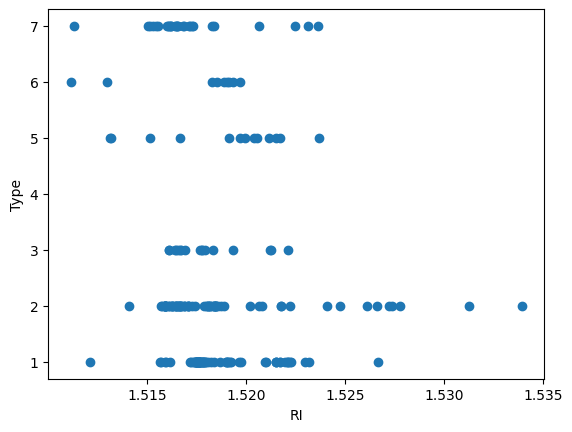

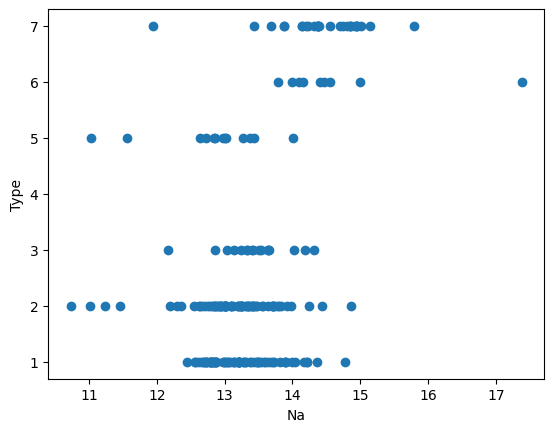

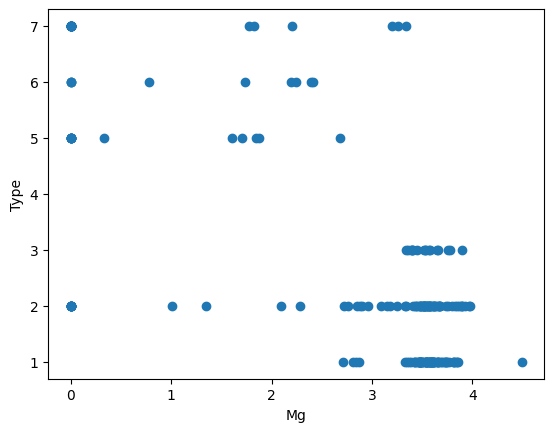

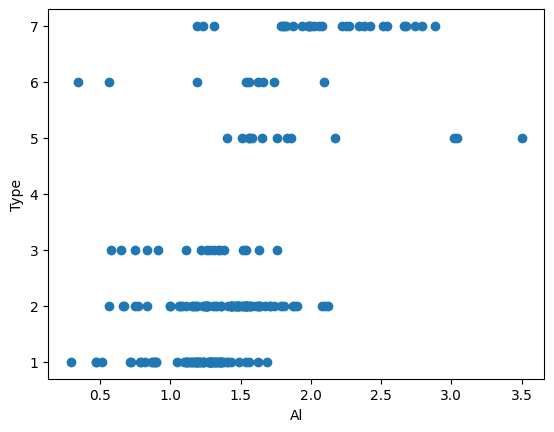

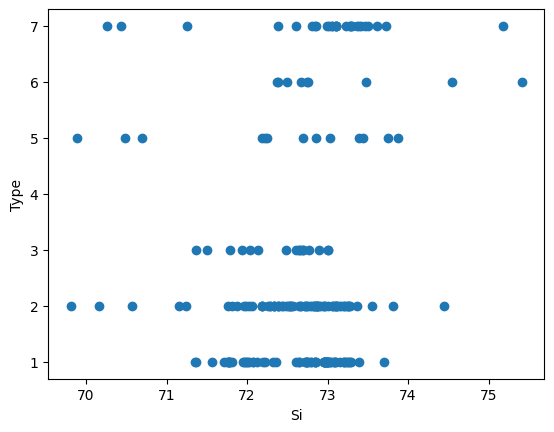

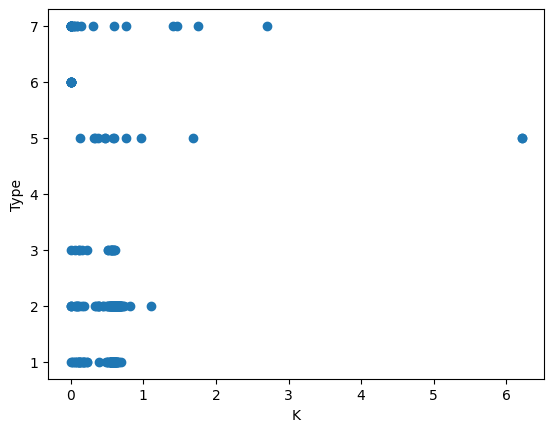

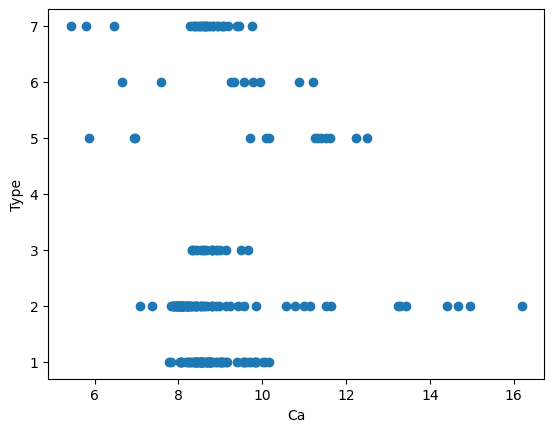

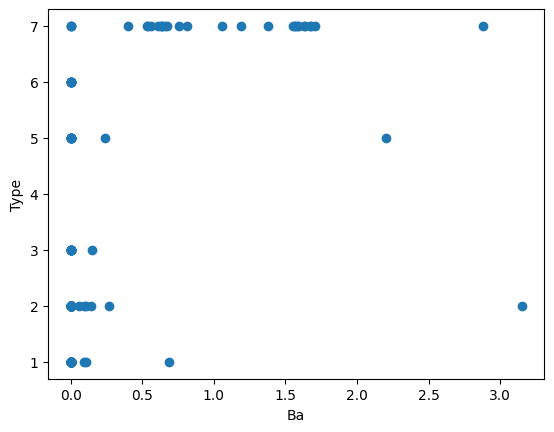

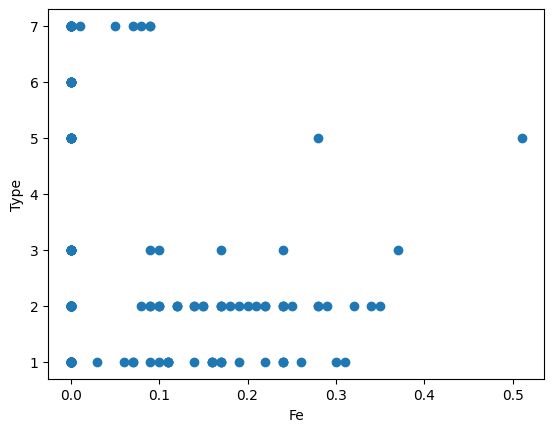

In [7]:
#ploting the scatter plot for the data with respect to the target variable:

import matplotlib.pyplot as plt
import seaborn as sns

columns = df.drop(columns = "Type" )
for col in columns:
    plt.figure()
    plt.scatter(x = df[col],y = df["Type"])
    plt.xlabel(col)
    plt.ylabel("Type")
    plt.show()

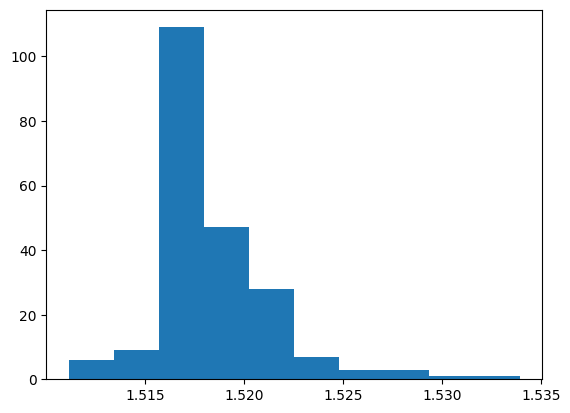

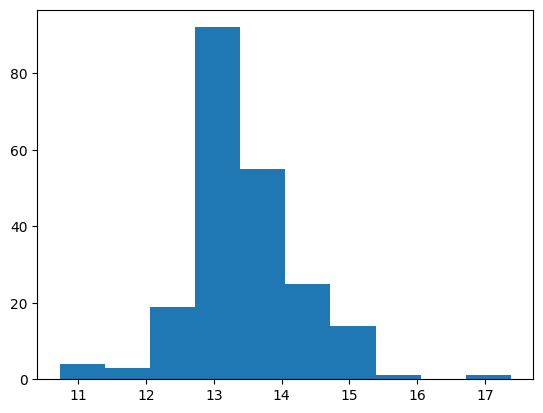

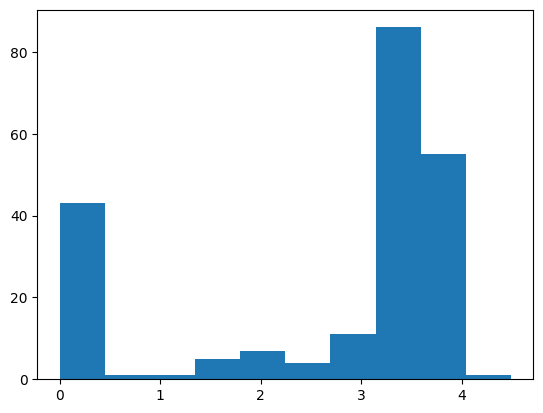

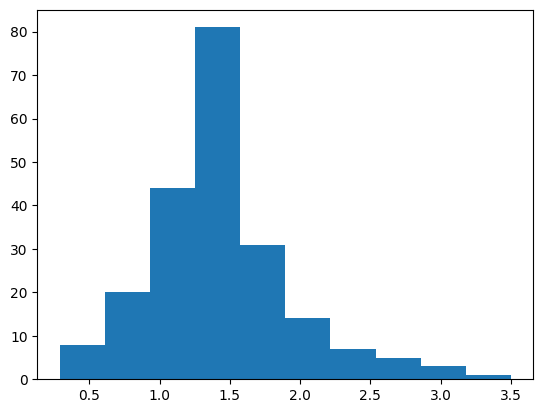

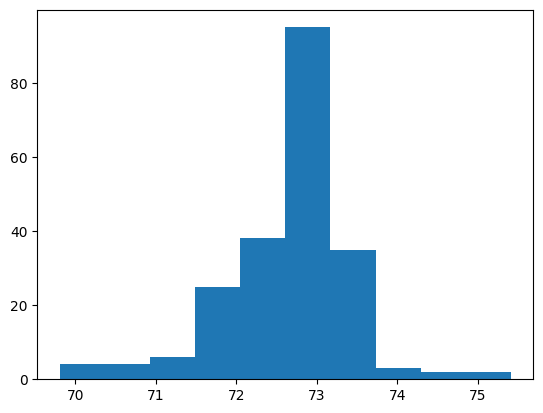

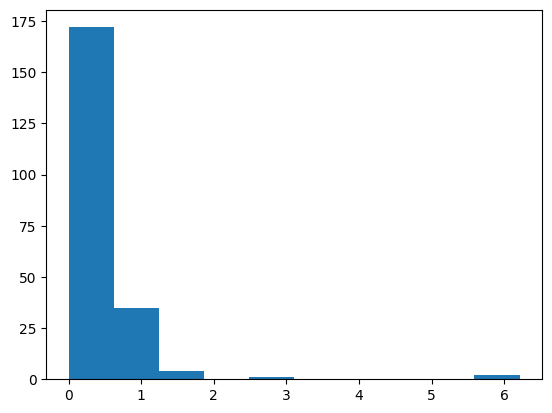

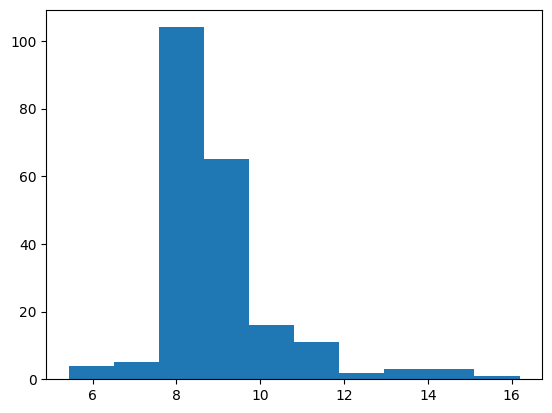

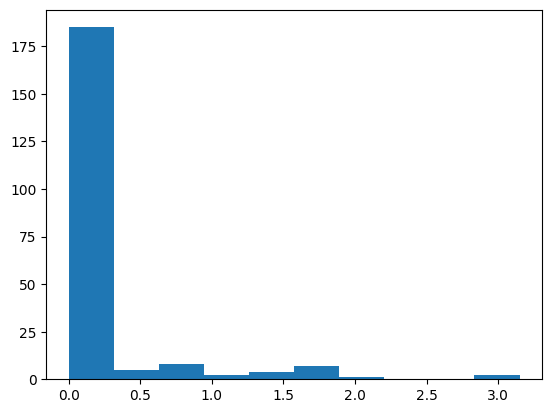

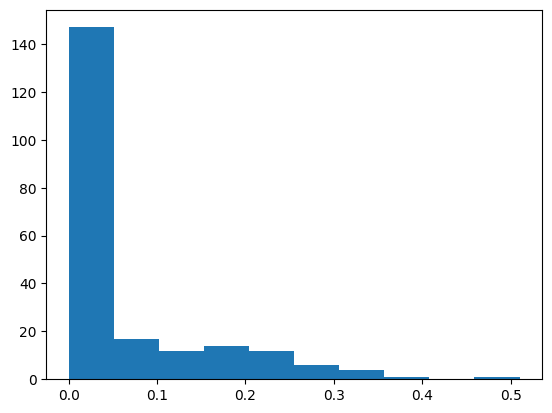

In [9]:
# ploting the histogram for the given data in the dataset:

for col in columns:
    plt.figure()
    plt.hist(df[col])
    plt.show()

from the above histograms of the data, we can conclude that the some of the rows are having the skewedness in them. so that means there are outlayers in the columns in the dataset.

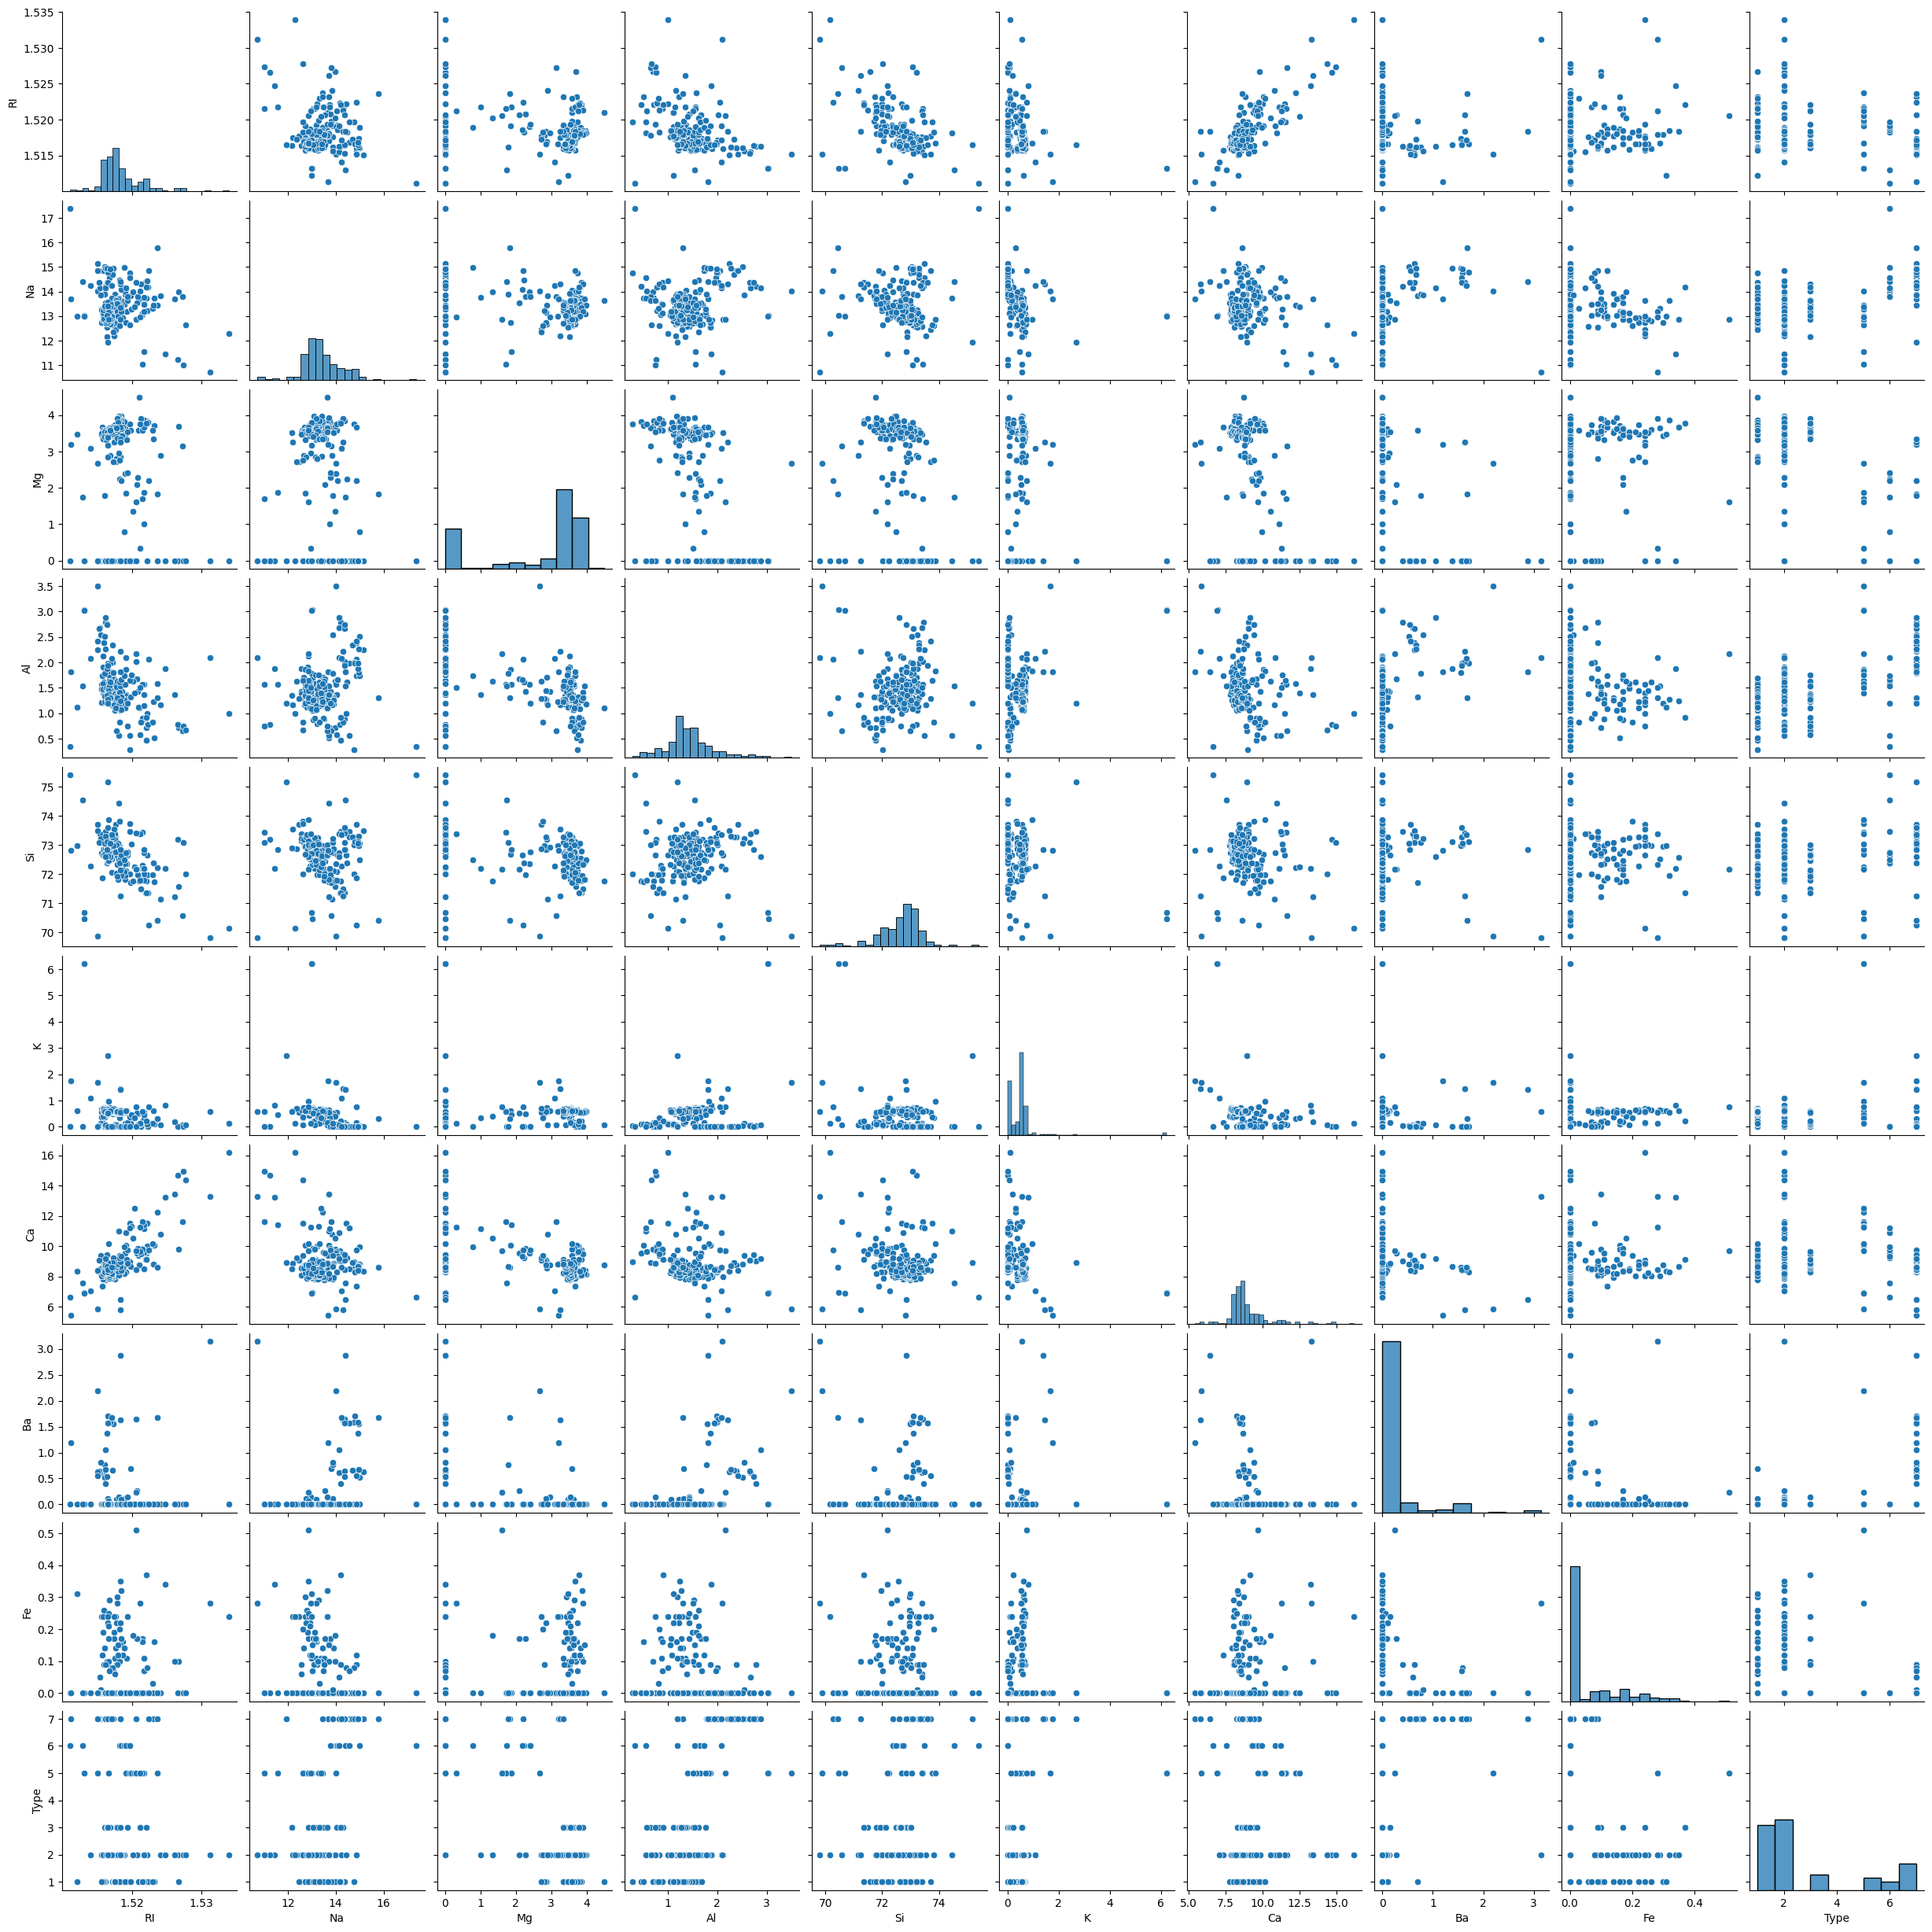

In [12]:
sns.pairplot(df)

<Axes: >

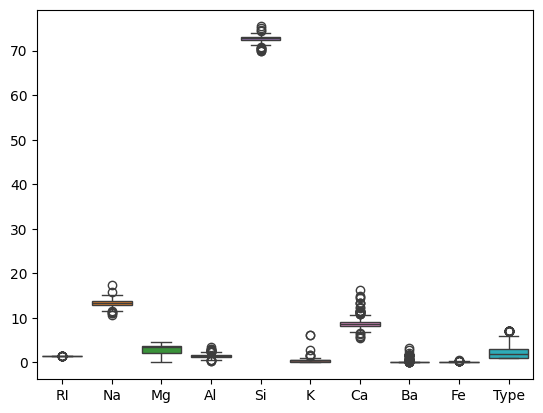

In [13]:
sns.boxplot(df)

In [14]:
# removing the outlayers from the data set:

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
df = df[
        ~((df.lt(q1 - 1.5 * iqr)) | (df.gt(q3 + 1.5 * iqr))).any(axis=1)
]

<Axes: >

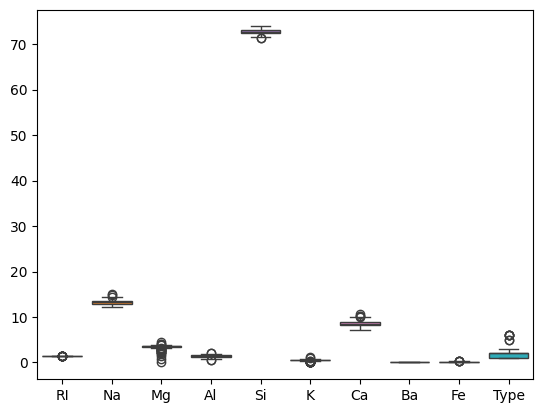

In [15]:
sns.boxplot(df)

In [18]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
176,1.51905,14.00,2.39,1.56,72.37,0.0,9.57,0.0,0.0,6
177,1.51937,13.79,2.41,1.19,72.76,0.0,9.77,0.0,0.0,6
178,1.51829,14.46,2.24,1.62,72.38,0.0,9.26,0.0,0.0,6
179,1.51852,14.09,2.19,1.66,72.67,0.0,9.32,0.0,0.0,6
181,1.51888,14.99,0.78,1.74,72.50,0.0,9.95,0.0,0.0,6


In [21]:
# data transformation:

from sklearn.preprocessing import StandardScaler
column = df.columns
ss = StandardScaler()
df_new = ss.fit_transform(df.iloc[:,:])
df_new = pd.DataFrame(df_new)
df_new.columns = column
df_new

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.835794,0.832792,1.951940,-0.879521,-1.873977,-2.077398,0.210063,0.0,-0.598819,-0.776921
1,-0.147828,1.348359,0.335031,0.057504,0.075285,-0.090110,-1.254994,0.0,-0.598819,-0.776921
2,-0.982116,0.605943,0.244193,0.706214,0.608767,-0.515957,-1.334617,0.0,-0.598819,-0.776921
3,-0.118657,-0.053983,0.498538,-0.194772,-0.170938,0.335738,-0.633937,0.0,-0.598819,-0.776921
4,-0.258677,0.069753,0.371366,-0.374969,0.793434,0.241105,-0.872805,0.0,-0.598819,-0.776921
...,...,...,...,...,...,...,...,...,...,...
131,0.692294,1.575209,-1.863240,0.778293,-0.663383,-2.361296,1.515875,0.0,-0.598819,3.700252
132,0.878988,1.142132,-1.826905,-0.555166,0.136841,-2.361296,1.834366,0.0,-0.598819,3.700252
133,0.248896,2.523852,-2.135753,0.994529,-0.642864,-2.361296,1.022215,0.0,-0.598819,3.700252
134,0.383083,1.760813,-2.226591,1.138687,-0.047826,-2.361296,1.117762,0.0,-0.598819,3.700252


In [22]:
X = df.drop(columns = "Type")
Y = df["Type"]

In [23]:
# splitting the data into train and test dataset:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = RandomForestClassifier()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print("train acuracy : ",accuracy_score(y_train,y_train_pred))
print("test accuracy : ",accuracy_score(y_test,y_test_pred))

train acuracy :  1.0
test accuracy :  0.7142857142857143


In [27]:
# cross validation:

training_accuracy = []
test_accuracy = []
for i in range(1,201):
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size= 0.3, random_state= i)
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    training_accuracy . append(accuracy_score(y_train,y_train_pred))
    test_accuracy .append(accuracy_score(y_test,y_test_pred))
print("Cross validaton training accuracy:",np.round(np.mean(training_accuracy)*100,2))
print("Cross validaton test accuracy:",np.round(np.mean(test_accuracy)*100,2)) 


Cross validaton training accuracy: 99.99
Cross validaton test accuracy: 75.99


In [28]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='macro'))
print("Recall:", recall_score(y_test, y_test_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='macro'))


Accuracy: 0.8536585365853658
Precision: 0.91875
Recall: 0.8576388888888888
F1 Score: 0.8792763157894736


In [29]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


In [31]:
# Store results
results = {}
from sklearn.tree import DecisionTreeClassifier
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_model.fit(x_train, y_train)
y_pred_bag = bagging_model.predict(x_test)
results['Bagging'] = accuracy_score(y_test, y_pred_bag)

# Random Forest (Bagging Ensemble)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
results['Random Forest'] = accuracy_score(y_test, y_pred_rf)

# AdaBoost (Boosting)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(x_train, y_train)
y_pred_ada = ada_model.predict(x_test)
results['AdaBoost'] = accuracy_score(y_test, y_pred_ada)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)
results['Gradient Boosting'] = accuracy_score(y_test, y_pred_gb)


In [32]:
print("Model Performance Comparison (Accuracy):\n")
for model_name, acc in results.items():
    print(f"{model_name:20s} : {acc:.4f}")


Model Performance Comparison (Accuracy):

Bagging              : 0.8049
Random Forest        : 0.8049
AdaBoost             : 0.6829
Gradient Boosting    : 0.8537


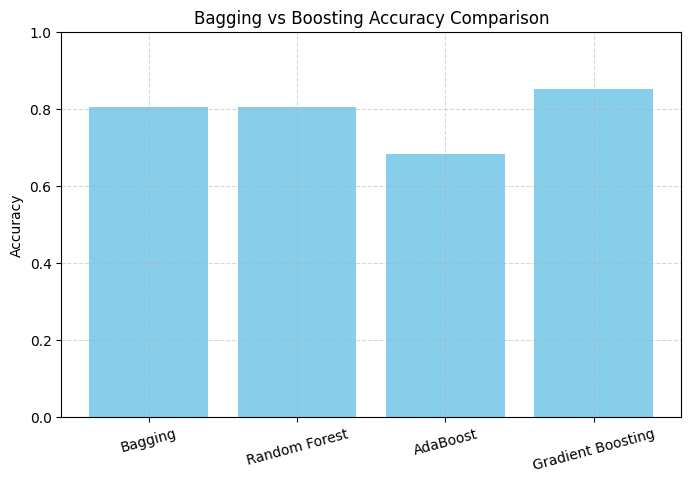

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Bagging vs Boosting Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Interview Questions:

1.Bagging (Bootstrap Aggregating)
Bagging builds multiple independent models (usually decision trees) on random subsets of the data (with replacement).
Final prediction is made by majority voting (for classification) or averaging (for regression).
It reduces variance and prevents overfitting.

2.Boosting
Boosting builds models sequentially, where each new model focuses on correcting the errors made by the previous ones.
Each instance gets a weight — more weight is given to misclassified points.
It reduces bias and can improve accuracy, but may overfit on noisy data.



Handling Imbalance in Data
1. Resampling Techniques
   Oversampling the minority class
2. Class Weights
   Use class_weight='balanced' in models like SVM, LogisticRegression, RandomForest, etc.
3.Use Evaluation Metrics for Imbalance
  Accuracy is misleading for imbalanced data. Use:
  Precision, Recall, F1-score
  ROC-AUC score
  Confusion Matrix